<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE303L-AIandML/Lab9/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiotocography

## Objective: To classify Cardiotocography dataset 10-class and 3-class problems, respectively. To experiment the influence of strategies such as,
1. Feature Scaling
2. Feature Selection
3. Splitting of dataset and random seeds
4. Cross validation

# Dataset:
2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …) and to a fetal state (N, S, P). Therefore, the dataset can be used either for 10-class or 3-class experiments.

# Attribute Information:
1.	LB - FHR baseline (beats per minute)
2.	AC - # of accelerations per second
3.	FM - # of fetal movements per second
4.	UC - # of uterine contractions per second
5.	DL - # of light decelerations per second
6.	DS - # of severe decelerations per second
7.	DP - # of prolongued decelerations per second
8.	ASTV - percentage of time with abnormal short term variability
9.	MSTV - mean value of short term variability
10.	ALTV - percentage of time with abnormal long term variability
11.	MLTV - mean value of long term variability
12.	Width - width of FHR histogram
13.	Min - minimum of FHR histogram
14.	Max - Maximum of FHR histogram
15.	Nmax - # of histogram peaks
16.	Nzeros - # of histogram zeros
17.	Mode - histogram mode
18.	Mean - histogram mean
19.	Median - histogram median
20.	Variance - histogram variance
21.	Tendency - histogram tendency

# Target classes
CLASS - FHR pattern class code (1 to 10)
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

#Source:
https://archive.ics.uci.edu/ml/datasets/Cardiotocography

# Tasks:
## Task 1: Take class (1 to 10) as a target class.  
    a.	Load the dataset
    b.	Shuffles the rows of the dataset
    c.	Apply pre-processing techniques (if required)
    d.	Take X [independent features] =data[1: 21] and Y= CLASS - FHR pattern class code (1 to 10)
    e.	Divide the dataset into training (70%) and testing (30%) fractions
    f.	Apply logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum four models will be implemented.
    g.	Evaluate and store the respective training and testing accuracy values
    h.	Plot two boxplots for training and testing accuracy, respectively, by considering all the models. Note that use only single boxplot to show the performance of every model i.e., in total two boxplots one for training and one for testing. 
    i. Print all the classification measures supported by sklearn
    j.	Concludes the results 

Perform the following tasks to find influence of different strategies (Use above tasks from a to j)

    1. Compute model results with and without feature scaling and see which models work well even without scaling
    2. Perform different feature selection stragies using correlation analysis, forward selection, backward elimination, recursive feature elimination etc. Find minimal and best possible subset of features from each method.
    3. Split the dataset into different splits such as 90-10, 80-20, 70-30... 10-90. Find best split size which gives good accuracy for both training and testing.
    4. Split the dataset with different random state values and experiment the models. Find whether there is any influence of random state value and experiment.
    4. Perform classification with k-fold cross validation. Experiment with different k values and find what is their influence.

## Task 2: Take fetal state as a target class.
    a.	Load the dataset
    b.	Shuffles the rows of the dataset
    c.	Apply pre-processing techniques (if required)
    d.	Take X [independent features] =data[1: 21] and Y= NSP - fetal state class code (N=normal; S=suspect; P=pathologic)
    e.	Divide the dataset into training (70%) and testing (30%) fractions
    f.	Apply logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum for models will be implemented.
    g.	Evaluate and store the respective training and testing accuracy values. 
    h.	Plot two boxplots for training and testing accuracy, respectively, by considering all the models. Note that use only single boxplot to show the performance of every model i.e., in total two boxplots one for training and one for testing.  
    i. Print all the classification measures supported by sklearn
    j.	Concludes the results 

Perform the following tasks to find influence of different strategies (Use above tasks from a to j)

    1. Compute model results with and without feature scaling and see which models work well even without scaling
    2. Perform different feature selection stragies using correlation analysis, forward selection, backward elimination, recursive feature elimination etc. Find minimal and best possible subset of features from each method.
    3. Split the dataset into different splits such as 90-10, 80-20, 70-30... 10-90. Find best split size which gives good accuracy for both training and testing.
    4. Split the dataset with different random state values and experiment the models. Find whether there is any influence of random state value and experiment.
    4. Perform classification with k-fold cross validation. Experiment with different k values and find what is their influence.

# Helping links:
https://www.tutorialspoint.com/python_data_science/python_box_plots.htm#:~:text=Advertisements,quartile%20in%20the%20data%20set.
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
https://python-graph-gallery.com/boxplot/
https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html




## Task 1: Take class (1 to 10) as a target class. 

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [2]:
a="""
LB - FHR baseline (beats per minute)
AC - # of accelerations per second
FM - # of fetal movements per second
UC - # of uterine contractions per second
DL - # of light decelerations per second
DS - # of severe decelerations per second
DP - # of prolongued decelerations per second
ASTV - percentage of time with abnormal short term variability
MSTV - mean value of short term variability
ALTV - percentage of time with abnormal long term variability
MLTV - mean value of long term variability
Width - width of FHR histogram
Min - minimum of FHR histogram
Max - Maximum of FHR histogram
Nmax - # of histogram peaks
Nzeros - # of histogram zeros
Mode - histogram mode
Mean - histogram mean
Median - histogram median
Variance - histogram variance
Tendency - histogram tendency
CLASS - FHR pattern class code (1 to 10)
NSP - fetal state class code (N=normal; S=suspect; P=pathologic)
"""

In [13]:
# Load the dataset 
# Shuffel the dataset
df=pd.read_excel('https://github.com/adityav1810/Semester_5_Labs/raw/master/ECSE303L-AIandML/Lab9/CTG.xls',1,skiprows=1)
cols=[a.splitlines()[1:][i].split()[0] for i in range(len(a.splitlines()[1:]))]
df=df[cols]
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [14]:
for i in df.columns:
    print(i,df[i].value_counts(dropna=False)[np.nan])
df.dropna(inplace=True)

LB 3
AC 3
FM 2
UC 2
DL 1
DS 1
DP 1
ASTV 2
MSTV 2
ALTV 2
MLTV 2
Width 3
Min 3
Max 3
Nmax 3
Nzeros 3
Mode 3
Mean 3
Median 3
Variance 3
Tendency 3
CLASS 3
NSP 3


In [15]:
scaler=MinMaxScaler()
df.iloc[:,0:21]=scaler.fit_transform(df.iloc[:,0:21])
df=pd.DataFrame(df,columns=cols)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,0.259259,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0,9.0,2.0
1,0.481481,0.153846,0.000000,0.173913,0.125,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5,6.0,1.0
2,0.500000,0.076923,0.000000,0.217391,0.125,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5,6.0,1.0
3,0.518519,0.076923,0.000000,0.260870,0.125,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0,6.0,1.0
4,0.481481,0.153846,0.000000,0.217391,0.000,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.629630,0.000000,0.000000,0.260870,0.000,0.0,0.0,0.893333,0.000000,0.274725,0.142012,0.209040,0.798165,0.474138,0.222222,0.0,0.732283,0.706422,0.688073,0.007435,0.5,5.0,2.0
2122,0.629630,0.038462,0.000000,0.391304,0.000,0.0,0.0,0.880000,0.029412,0.241758,0.140039,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.688073,0.678899,0.011152,1.0,5.0,2.0
2123,0.629630,0.038462,0.000000,0.304348,0.000,0.0,0.0,0.893333,0.029412,0.219780,0.120316,0.361582,0.486239,0.413793,0.277778,0.0,0.732283,0.688073,0.688073,0.014870,1.0,5.0,2.0
2124,0.629630,0.038462,0.000000,0.391304,0.000,0.0,0.0,0.880000,0.029412,0.296703,0.138067,0.355932,0.486239,0.405172,0.333333,0.0,0.724409,0.678899,0.678899,0.014870,1.0,5.0,2.0


In [16]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
from random import shuffle
indexes=list(df.index)
shuffle(indexes)
df=pd.DataFrame(df,index=indexes)
df.head(3)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
717,0.481481,0.000000,0.000000,0.086957,0.00,0.0,0.0,0.693333,0.029412,0.417582,0.124260,0.107345,0.651376,0.181034,0.111111,0.0,0.574803,0.541284,0.513761,0.000000,0.5,10.0,2.0
1787,0.277778,0.153846,0.005319,0.130435,0.25,0.0,0.0,0.586667,0.250000,0.000000,0.059172,0.542373,0.183486,0.405172,0.277778,0.1,0.503937,0.440367,0.458716,0.141264,0.5,6.0,1.0
1511,0.444444,0.115385,0.000000,0.347826,0.00,0.0,0.0,0.333333,0.102941,0.000000,0.264300,0.225989,0.568807,0.284483,0.166667,0.0,0.598425,0.559633,0.532110,0.011152,0.5,2.0,1.0


In [17]:
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:21], df.iloc[:,21], test_size=0.30, random_state=42)

In [18]:
# Implement logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum for models will be implemented.
# Not all models can be obtained from sklearn 
model1=LogisticRegression()
model2=DecisionTreeClassifier()
model3=RandomForestClassifier(n_estimators=100)
model4=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)




In [19]:
# Train and test the models
model1.fit(X_train,y_train)
print("Model 1 Trained")
model2.fit(X_train,y_train)
print("Model 2 Trained")
model3.fit(X_train,y_train)
print("Model 3 Trained")
model4.fit(X_train,y_train)
print("Model 4 Trained")


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model 1 Trained
Model 2 Trained
Model 3 Trained
Model 4 Trained


In [20]:
# Build training accuracy boxplot analysis 
model1train=accuracy_score(y_train,model1.predict(X_train))
model1test=accuracy_score(y_test,model1.predict(X_test))

model2train=accuracy_score(y_train,model2.predict(X_train))
model2test=accuracy_score(y_test,model2.predict(X_test))

model3train=accuracy_score(y_train,model3.predict(X_train))
model3test=accuracy_score(y_test,model3.predict(X_test))

model4train=accuracy_score(y_train,model4.predict(X_train))
model4test=accuracy_score(y_test,model4.predict(X_test))

In [21]:
box=pd.DataFrame({'Training Accuracy':[model1train,model2train,model3train,model4train]
                  ,'Testing Accuracy':[model1test,model2test,model3test,model4test]})
box['Models']=['Model1','Model2','Model3','Model4']

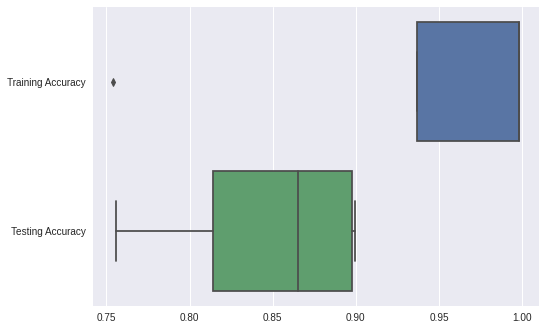

In [22]:
# Build testing accuracy boxplot analysis 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.boxplot(data=box,hue_order='models',orient='h')

## Task 2: Take fetal state as a target class.

In [23]:
# Use the preprocessed dataset here


In [24]:
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:21], df.iloc[:,22], test_size=0.30, random_state=42)

In [25]:
# Implement logistic regression variants and variants of tree/forest-based classification models (implemented so far in Labs). Note: Minimum for models will be implemented.
# Not all models can be obtained from sklearn 
model1=LogisticRegression()
model2=DecisionTreeClassifier()
model3=RandomForestClassifier(n_estimators=100)
model4=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)




In [26]:
# Train and test the models
model1.fit(X_train,y_train)
print("Model 1 Trained")
model2.fit(X_train,y_train)
print("Model 2 Trained")
model3.fit(X_train,y_train)
print("Model 3 Trained")
model4.fit(X_train,y_train)
print("Model 4 Trained")

Model 1 Trained
Model 2 Trained
Model 3 Trained
Model 4 Trained


In [27]:
# Build training accuracy boxplot analysis 
model1train=accuracy_score(y_train,model1.predict(X_train))
model1test=accuracy_score(y_test,model1.predict(X_test))

model2train=accuracy_score(y_train,model2.predict(X_train))
model2test=accuracy_score(y_test,model2.predict(X_test))

model3train=accuracy_score(y_train,model3.predict(X_train))
model3test=accuracy_score(y_test,model3.predict(X_test))

model4train=accuracy_score(y_train,model4.predict(X_train))
model4test=accuracy_score(y_test,model4.predict(X_test))

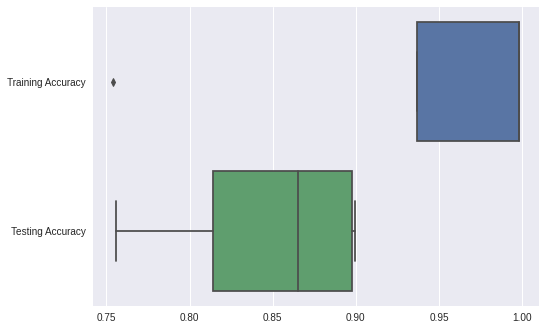

In [28]:
# Build testing accuracy boxplot analysis 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.boxplot(data=box,hue_order='models',orient='h')

In [29]:
# Play with the intial/hyper parameters of the models and try to build more boxplots (Optional)

